# Logging with `dataframe_utils`

One may use the `log2html` or `log2latex` functions in `dataframe_utils` to generate logs in HTML or LaTeX format and display them in the browser once they are generated.

Place them somewhere in your Python scripts so that you can see the results in the browser rather than in the console.

In [1]:
# use project files rather than installed PyBMF

%load_ext autoreload
%autoreload 2

import sys
sys.path.insert(0, '../')

c:\Users\nieht\Anaconda3\envs\pybmf\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[I] m            : 300
[I] n            : 500
[I] k            : 5
[I] overlap      : 2
[I] seed         : 1000
[I] noise        : 2
[I] seed         : 2000
[I] Using RandomState.


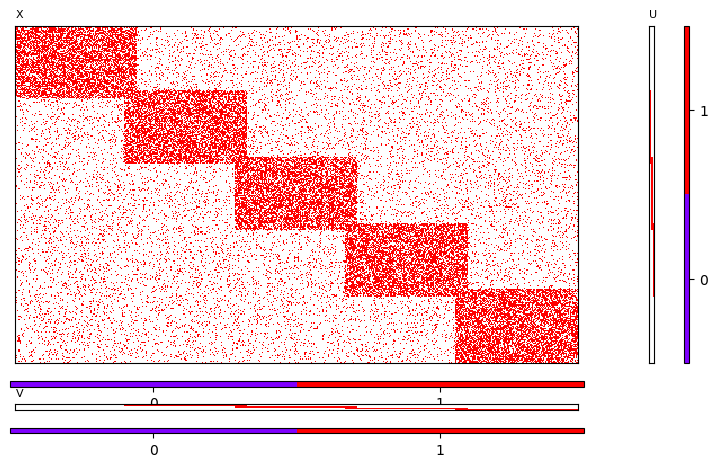

<Figure size 640x480 with 0 Axes>

In [2]:
# generating synthetic data

from PyBMF.generators import BlockDiagonalMatrixGenerator

data = BlockDiagonalMatrixGenerator(m=300, n=500, k=5, overlap=[0.1, 0.1])
data.generate(seed=1000)
data.add_noise(noise=[0.4, 0.1], seed=2000)

data.show_matrix(scaling=0.5)

In [3]:
from PyBMF.datasets import RatioSplit, NoSplit

# split = RatioSplit(X=data.X, val_size=0.1, test_size=0.2, seed=1997)
split = NoSplit(X=data.X)

# split.negative_sample(
#     train_size=split.pos_train_size, 
#     val_size=split.pos_val_size, 
#     test_size=split.pos_test_size, 
#     seed=2023, type='popularity')

X_train, X_val, X_test = split.X_train, split.X_val, split.X_test

[I] NoSplit, sampling positives
[I] RatioSplit, sampling positives
[I]   seed         : 1721849067
[I]   train_size   : 34090
[I]   val_size     : 0
[I]   test_size    : 0
[I]   seed         : 1721849067


[I] tau          : 0.25
[I] k            : 5
[I] tol          : 0
[I] w_fp         : 0.5
[I] w_fn         : None
[I] verbose      : False
[I] display      : False
[I] task         : reconstruction
[I] Missing validation data.
[W] Missing testing data.


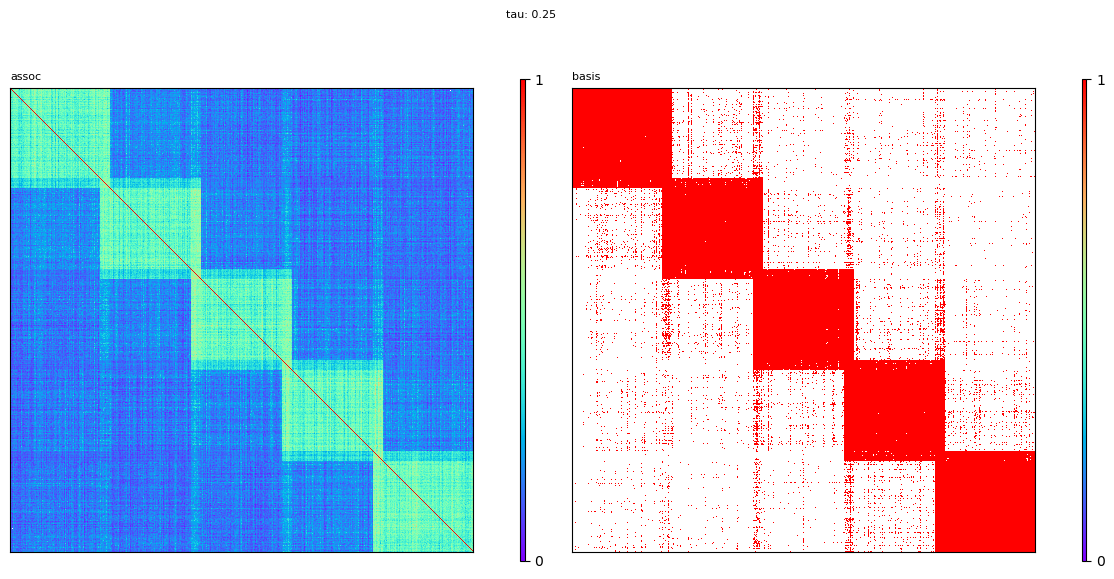

100%|██████████| 5/5 [00:10<00:00,  2.03s/it]                


[W] Stopped in advance: Reach requested factor
[I] time elapsed :  11s
[I] model saved as: 2024-07-25 03-24-27-741417 Asso.pickle


<Figure size 640x480 with 0 Axes>

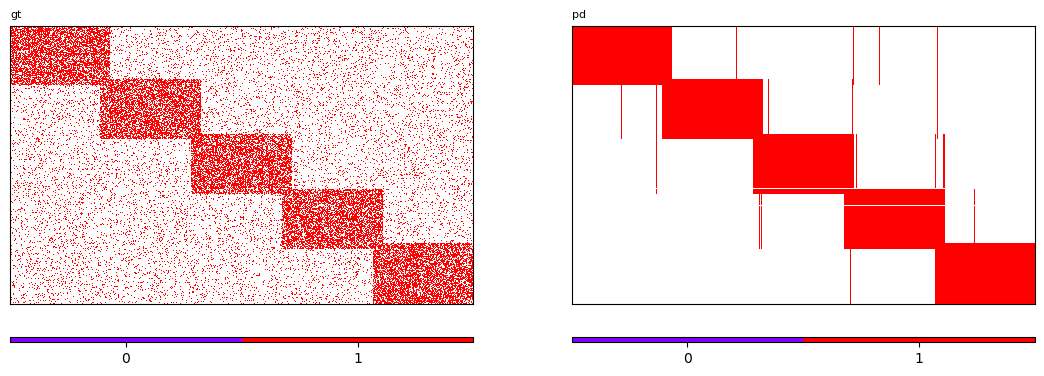

train                                       \
                              0                                        
                time  k   score score_0.5 desc_len      shape     TP   
0  25/07/24 03:24:30  0  1012.0    1012.0  32242.0  [66, 110]   4642   
1  25/07/24 03:24:32  1  1907.0    1907.0  30629.0  [65, 112]   9177   
2  25/07/24 03:24:34  2  2778.5    2778.5  29064.0  [64, 114]  13651   
3  25/07/24 03:24:36  3  3632.0    3632.0  27536.0  [65, 114]  18157   
4  25/07/24 03:24:38  4  4439.0    4439.0  26100.0  [62, 116]  22458   

                                                                             \
                                                                              
        TPR     FP       FPR     FN       FNR       ERR       ACC    Recall   
0  0.136169   2618  0.022586  29448  0.863831  0.213773  0.786227  0.136169   
1  0.269199   5363  0.046269  24913  0.730801  0.201840  0.798160  0.269199   
2  0.400440   8094  0.069830  20439  0.599560  0.190220  0.809780  0.400440   
3  0.532620  10893  0.093978  15933  0.467380  0.178840  0.821160  0.532620   
4  0.658786  13580  0.117160  11632  0.341214  0.168080  0.831920  0.658786   

                       
                       
  Precision        F1  
0  0.639394  0.224522  
1  0.631155  0.377421  
2  0.627777  0.488976  
3  0.625026  0.575135  
4  0.623176  0.640486

<Figure size 640x480 with 0 Axes>

In [4]:
from PyBMF.models import Asso

k = 5
tau = 0.25
w_fp = 0.5

model = Asso(k=k, tau=tau, w_fp=w_fp)
model.fit(X_train=X_train, X_val=None, X_test=None, task='reconstruction', verbose=False, display=False)

In [5]:
# render as HTML and open in browser

from PyBMF.utils import log2html
log2html(df=model.logs['updates'], log_name=model.name, open_browser=True)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] HTML saved as: D:\PyBMF-bulky\saved_logs\2024-07-25 03-24-27-741417 Asso.html
[I] Opening HTML in browser: C:/Program Files/Google/Chrome/Application/chrome.exe %s


In [6]:
# render as LaTeX and open in Overleaf

from PyBMF.utils import log2latex
log2latex(df=model.logs['updates'], log_name=model.name, open_browser=True)

[I] Found settings.ini at d:\MEGA\PyBMF\examples\settings.ini
[I] HTML saved as: D:\PyBMF-bulky\saved_logs\2024-07-25 03-24-27-741417 Asso_overleaf.html
[I] Opening HTML in browser: C:/Program Files/Google/Chrome/Application/chrome.exe %s
